In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("C:/Users/Pramila Bharti/Downloads/train.csv")
test = pd.read_csv("C:/Users/Pramila Bharti/Downloads/test.csv")

In [3]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleansing

In [5]:
print(f" Shape of the Data frame = {file.shape}") 
rows = file.shape[0]
print(f"Total number of rows in data set = {rows}")

 Shape of the Data frame = (891, 12)
Total number of rows in data set = 891


In [6]:
# Taking count of empty colunms

file_nul = file.isnull().sum()[file.isnull().sum()>0]
file_nul

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Leaving null colunms as is for now

In [8]:
#Checking data type of colunms
file_coldtype = file.dtypes
file_coldtype

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
file.select_dtypes(include = 'int64').head()

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0


In [10]:
file.select_dtypes(include = 'object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [11]:
file.select_dtypes(include = 'float').head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [12]:
file.Fare=file.Fare.fillna(file.Fare.mean())
test.Fare=test.Fare.fillna(file.Fare.mean())

In [13]:
# filling train set empty data of cabin with "unknown"
file.Cabin = file.Cabin.fillna("unknown")
test.Cabin = test.Cabin.fillna("unknown")
#file.Cabin[file.Cabin == "unknown"]

In [14]:
file.Embarked.mode()[0]

'S'

In [15]:
file.Embarked=file.Embarked.fillna(file.Embarked.mode()[0])
test.Embarked=test.Embarked.fillna(file.Embarked.mode()[0])

In [16]:
file['title']=file.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
test['title']=test.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

test['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [17]:
newtitles = {
    
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    'the Countess': "Royalty",
    'Mme' : "Mrs",
    'Mlle': "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [18]:
file["title"] = file.title.map(newtitles)
test["title"] = test.title.map(newtitles)


In [19]:
test.groupby(['title', 'Sex']).Age.mean()

title    Sex   
Master   male       7.406471
Miss     female    21.774844
Mr       male      32.000000
Mrs      female    38.903226
Officer  male      44.800000
Name: Age, dtype: float64

In [20]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age 

In [21]:
file.Age = file[['title','Sex','Age']].apply(newage, axis = 1)
test.Age = test[['title','Sex','Age']].apply(newage, axis = 1)

test.Age.head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [22]:
test.Age.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408    False
409    False
410    False
411    False
412    False
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


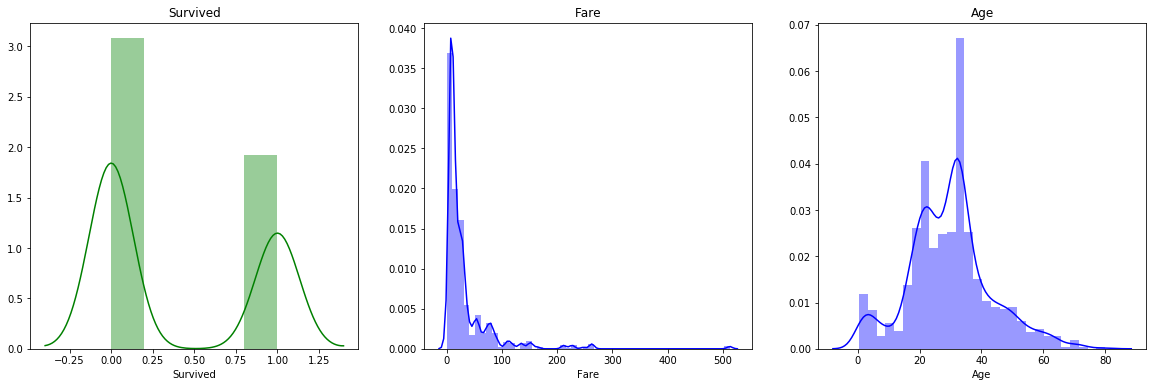

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Survived')
sns.distplot(file['Survived'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Fare')
sns.distplot(file['Fare'],color='blue')

# subplot 2
plt.subplot(1, 3, 3)
plt.title('Age')
sns.distplot(file['Age'],color='blue')




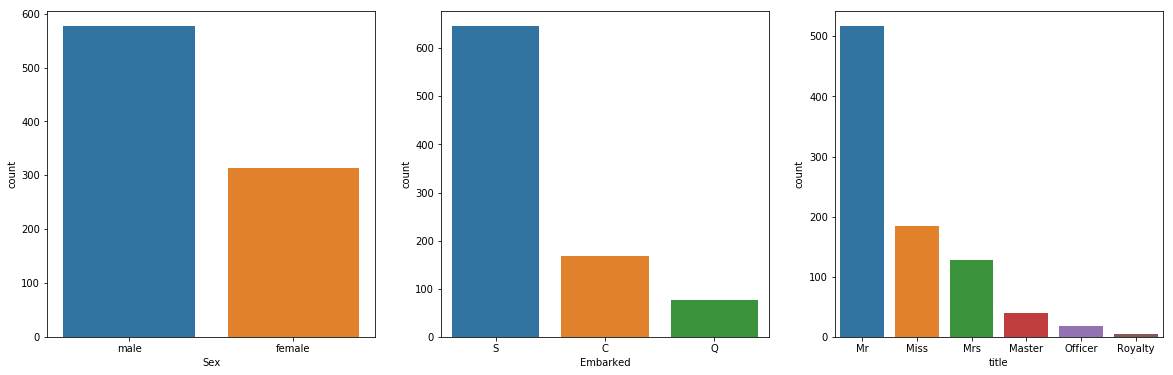

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
sns.countplot(data = file, x= 'Sex', order=file['Sex'].value_counts().index) 

plt.subplot(1, 3, 2)
sns.countplot(data = file, x= 'Embarked', order=file['Embarked'].value_counts().index) 

plt.subplot(1, 3, 3)
sns.countplot(data = file, x= 'title', order=file['title'].value_counts().index) 

In [25]:
# Bivariate Analysis

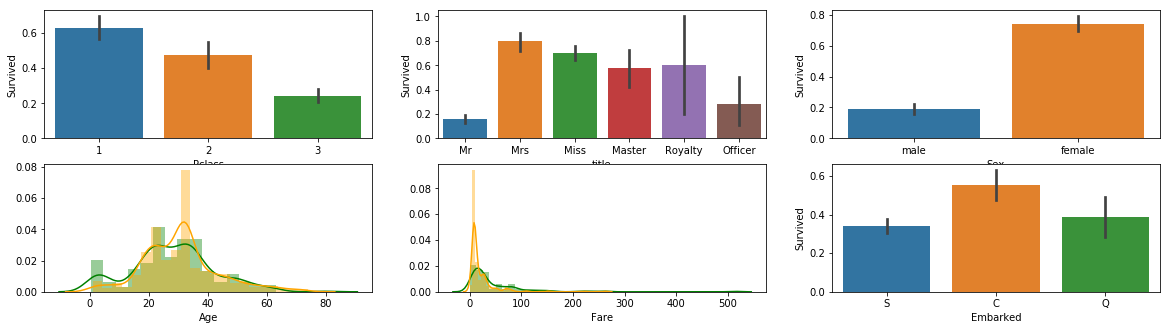

In [26]:
fig, ax = plt.subplots(figsize=(20,8))  
plt.subplot(3, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=file)

plt.subplot(3, 3, 2)
sns.barplot(x='title', y='Survived', data=file)

plt.subplot(3, 3, 3)
sns.barplot(x='Sex', y='Survived', data=file)

plt.subplot(3, 3, 4)
sns.distplot(file[file.Survived==1].Age, color='green')
sns.distplot(file[file.Survived==0].Age, color='Orange')

plt.subplot(3, 3, 5)
sns.distplot(file[file.Survived==1].Fare, color='green')
sns.distplot(file[file.Survived==0].Fare, color='Orange')

plt.subplot(3,3,6)
sns.barplot('Embarked','Survived',data=file)

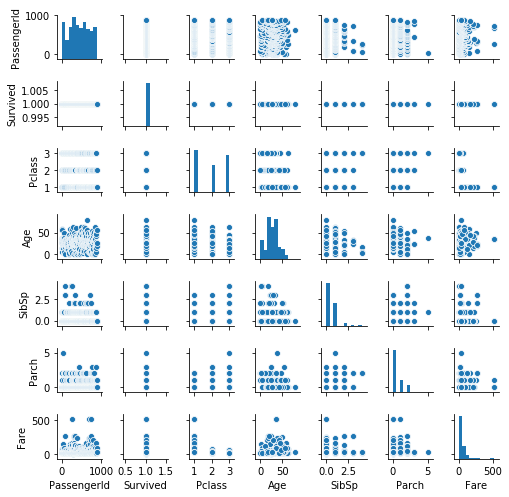

In [27]:
sns.pairplot(file[file.Survived ==1], height = 1)
plt.show()

In [28]:
#Clubbing SibSp and Parch 
#Counting number of characters in ticket and cabin

In [29]:
file['SibPar'] = file.SibSp + file.Parch
file['CabLen'] = file.Cabin.apply(lambda x : len(x))
file['TickLen'] = file.Ticket.apply(lambda x : len(x))

test['SibPar'] = test.SibSp + test.Parch
test['CabLen'] = test.Cabin.apply(lambda x : len(x))
test['TickLen'] = test.Ticket.apply(lambda x : len(x))

In [30]:
#Plotting graph on new colunms

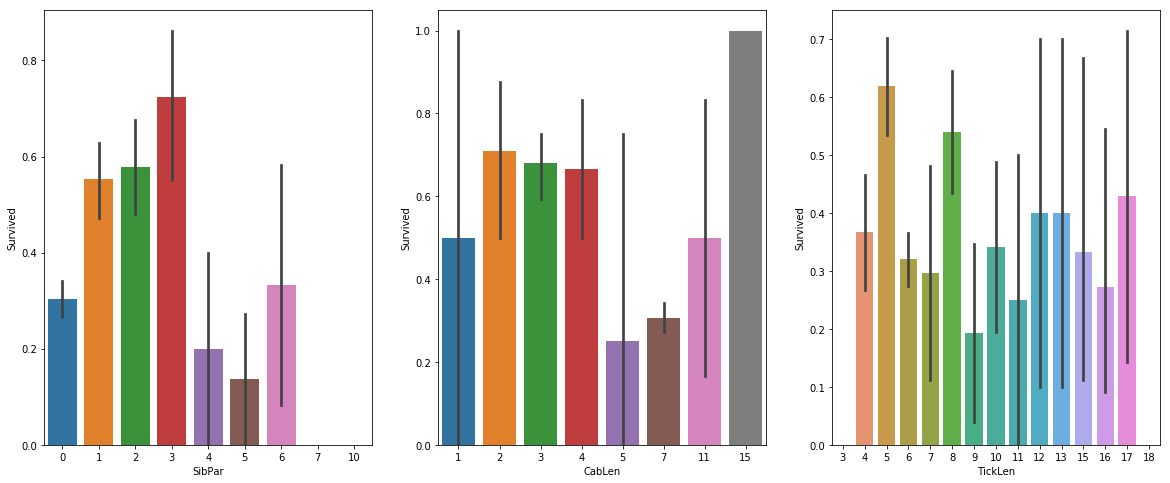

In [31]:
fig, ax = plt.subplots(figsize=(20,8))  
plt.subplot(1, 3, 1)
sns.barplot(x='SibPar', y='Survived', data=file)

plt.subplot(1, 3, 2)
sns.barplot(x='CabLen', y='Survived', data=file)

plt.subplot(1, 3, 3)
sns.barplot(x='TickLen', y='Survived', data=file)

In [32]:
# Dropping features that won't be used ##'PassengerId'
file.drop(['Name','Ticket','SibSp','Parch','Cabin'],axis=1,inplace=True)

## 'PassengerId'
test.drop(['Name','Ticket','SibSp','Parch','Cabin'],axis=1,inplace=True)



# Model Building

In [33]:
# Logistic Regression Model

In [34]:
# Making Dummy Variables

In [35]:
dummy1 = pd.get_dummies(file[['title', 'Embarked','Sex']], drop_first=True)

# Adding the results to the master dataframe
file = pd.concat([file, dummy1], axis=1)
test = pd.concat([test, dummy1], axis=1)

In [36]:
file.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,SibPar,CabLen,TickLen,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,male,22.0,7.2500,S,Mr,1,7,9,0,1,0,0,0,0,1,1
1,2,1,1,female,38.0,71.2833,C,Mrs,1,3,8,0,0,1,0,0,0,0,0
2,3,1,3,female,26.0,7.9250,S,Miss,0,7,16,1,0,0,0,0,0,1,0
3,4,1,1,female,35.0,53.1000,S,Mrs,1,4,6,0,0,1,0,0,0,1,0
4,5,0,3,male,35.0,8.0500,S,Mr,0,7,6,0,1,0,0,0,0,1,1


In [37]:
# Mapping Dual level variable

In [38]:
#Dropping repeated variables

file = file.drop(['Sex','Embarked','title'], 1)


In [39]:
test = test.drop(['Sex','Embarked', 'title'], 1)


In [40]:
file.head()

,PassengerId,Survived,Pclass,Age,Fare,SibPar,CabLen,TickLen,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22.0,7.2500,1,7,9,0,1,0,0,0,0,1,1
1,2,1,1,38.0,71.2833,1,3,8,0,0,1,0,0,0,0,0
2,3,1,3,26.0,7.9250,0,7,16,1,0,0,0,0,0,1,0
3,4,1,1,35.0,53.1000,1,4,6,0,0,1,0,0,0,1,0
4,5,0,3,35.0,8.0500,0,7,6,0,1,0,0,0,0,1,1


In [41]:
# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

file[['Pclass','Age','Fare', 'CabLen', 'TickLen']] = scaler.fit_transform(file[['Pclass','Age','Fare', 'CabLen', 'TickLen']])


file.head()

C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,PassengerId,Survived,Pclass,Age,Fare,SibPar,CabLen,TickLen,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_Q,Embarked_S,Sex_male
0,1,0,0.827377,-0.584459,-0.502445,1,0.448375,0.819672,0,1,0,0,0,0,1,1
1,2,1,-1.566107,0.620974,0.786845,1,-1.847613,0.455237,0,0,1,0,0,0,0,0
2,3,1,0.827377,-0.283101,-0.488854,0,0.448375,3.370717,1,0,0,0,0,0,1,0
3,4,1,-1.566107,0.394955,0.420730,1,-1.273616,-0.273633,0,0,1,0,0,0,1,0
4,5,0,0.827377,0.394955,-0.486337,0,0.448375,-0.273633,0,1,0,0,0,0,1,1


In [44]:
# Doing X- Y split

In [45]:
X_file = file.drop(['Survived'], axis =1)

Y_file = file['Survived']

Y_file.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

 Running First Training Model

In [46]:
import statsmodels.api as sm

In [47]:
# Logistic regression model
logm1 = sm.GLM(Y_file,(sm.add_constant(X_file)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      875
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -360.39
Date:                Sun, 21 Apr 2019   Deviance:                       720.77
Time:                        22:34:43   Pearson chi2:                     887.
No. Iterations:                    20   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.9559   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
PassengerId       0.0001      0.000      0.351      0.726      -0.001       0.001
Pclass           -0.7691      0.151     -5.106      0.000      -1.064      -0.474
Age              -0.4110      0.128     -3.200      0.001      -0.663      -0.159
Fare              0.2249      0.135      1.672      0.095      -0.039       0.489
SibPar           -0.4628      0.084     -5.487      0.000      -0.628      -0.297
CabLen           -0.2151      0.114     -1.884      0.060      -0.439       0.009
TickLen           0.0536      0.100      0.536      0.592      -0.142       0.250
title_Miss      -22.3557   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
title_Mr         -3.2560      0.537     -6.067      0.000      -4.308      -2.204
title_Mrs       -21.4191   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
title_Officer    -3.1509      0.835     -3.773      0.000      -4.788      -1.514
title_Royalty    -3.2942      1.368     -2.408      0.016      -5.976      -0.613
Embarked_Q       -0.1355      0.396     -0.342      0.732      -0.912       0.641
Embarked_S       -0.4272      0.250     -1.706      0.088      -0.918       0.063
Sex_male        -21.9978   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
=================================================================================
"""

In [48]:
# Reducing Variables using RFE

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [50]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 8)             # running RFE with 13 variables as output
rfe = rfe.fit(X_file, Y_file)

C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pramila Bharti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [51]:
list(zip(X_file.columns, rfe.support_, rfe.ranking_))

[('PassengerId', False, 8),
 ('Pclass', True, 1),
 ('Age', True, 1),
 ('Fare', False, 4),
 ('SibPar', False, 2),
 ('CabLen', False, 3),
 ('TickLen', False, 6),
 ('title_Miss', False, 5),
 ('title_Mr', True, 1),
 ('title_Mrs', True, 1),
 ('title_Officer', True, 1),
 ('title_Royalty', True, 1),
 ('Embarked_Q', False, 7),
 ('Embarked_S', True, 1),
 ('Sex_male', True, 1)]

In [52]:
rfe.support_

array([False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True])

In [53]:
col = X_file.columns[rfe.support_]

In [54]:
X_file.columns[~rfe.support_]

Index(['PassengerId', 'Fare', 'SibPar', 'CabLen', 'TickLen', 'title_Miss',
       'Embarked_Q'],
      dtype='object')

In [55]:
X_file_sm = sm.add_constant(X_file[col])
logm2 = sm.GLM(Y_file,X_file_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -384.01
Date:                Sun, 21 Apr 2019   Deviance:                       768.03
Time:                        22:34:44   Pearson chi2:                     977.
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2127      0.228      5.325      0.000       0.766       1.659
Pclass           -1.0011      0.106     -9.441      0.000      -1.209      -0.793
Age              -0.3083      0.119     -2.593      0.010      -0.541      -0.075
title_Mr         -1.8502      0.422     -4.383      0.000      -2.677      -1.023
title_Mrs         0.5913      0.321      1.844      0.065      -0.037       1.220
title_Officer    -1.8157      0.714     -2.541      0.011      -3.216      -0.415
title_Royalty    -1.4157      0.996     -1.421      0.155      -3.368       0.536
Embarked_S       -0.5507      0.199     -2.767      0.006      -0.941      -0.161
Sex_male         -0.7490      0.387     -1.935      0.053      -1.508       0.010
=================================================================================
"""

In [56]:
# Lets change type of target
file.Survived=file.Survived.astype('int')
file.Age=file.Age.astype('int')
file.Fare=file.Fare.astype('int')

#test.Age = test.Age.astype('int')
#test.Fare = test.Fare.astype('int')

file.Age.dtype

dtype('int32')

In [57]:
# Predicting values on train set
y_train_pred = res.predict(X_file_sm)
y_train_pred[:10]

0    0.070095
1    0.960090
2    0.480266
3    0.936990
4    0.052793
5    0.093183
6    0.282444
7    0.432766
8    0.619904
9    0.926883
dtype: float64

In [58]:
y_train_pred_final = pd.DataFrame({'Survived':Y_file.values, 'Survived_Prob':y_train_pred})
y_train_pred_final['PssngrID'] = file.PassengerId
y_train_pred_final.head()

,Survived,Survived_Prob,PssngrID
0,0,0.070095,1
1,1,0.960090,2
2,1,0.480266,3
3,1,0.936990,4
4,0,0.052793,5


Making probability greater than 0.5 as 1

In [59]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PssngrID,predicted
0,0,0.070095,1,0
1,1,0.960090,2,1
2,1,0.480266,3,0
3,1,0.936990,4,1
4,0,0.052793,5,0


In [60]:
from sklearn import metrics

In [61]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[459  90]
 [ 88 254]]


In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.8002244668911336


Checking VIFs

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_file[col].columns
vif['VIF'] = [variance_inflation_factor(X_file[col].values, i) for i in range(X_file[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Sex_male,17.12
2,title_Mr,16.67
6,Embarked_S,2.79
4,title_Officer,1.63
1,Age,1.53
3,title_Mrs,1.38
0,Pclass,1.20
5,title_Royalty,1.08


Dropping "Sex_male"

In [65]:
col = col.drop('Sex_male', 1)


In [66]:
X_file_sm = sm.add_constant(X_file[col])
logm3 = sm.GLM(Y_file,X_file_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -385.88
Date:                Sun, 21 Apr 2019   Deviance:                       771.76
Time:                        22:34:45   Pearson chi2:                     974.
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1333      0.222      5.113      0.000       0.699       1.568
Pclass           -0.9862      0.105     -9.383      0.000      -1.192      -0.780
Age              -0.2357      0.111     -2.115      0.034      -0.454      -0.017
title_Mr         -2.5226      0.242    -10.410      0.000      -2.998      -2.048
title_Mrs         0.6502      0.316      2.055      0.040       0.030       1.270
title_Officer    -2.4953      0.621     -4.021      0.000      -3.712      -1.279
title_Royalty    -1.8313      0.959     -1.909      0.056      -3.711       0.049
Embarked_S       -0.5672      0.198     -2.866      0.004      -0.955      -0.179
=================================================================================
"""

In [67]:
Y_file_pred = res.predict(X_file_sm).values.reshape(-1)

In [68]:
y_train_pred_final['Survive_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Survive_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PssngrID,predicted,Survive_Prob
0,0,0.070095,1,0,0.070095
1,1,0.960090,2,1,0.960090
2,1,0.480266,3,0,0.480266
3,1,0.936990,4,1,0.936990
4,0,0.052793,5,0,0.052793


In [69]:
vif = pd.DataFrame()
vif['Features'] = X_file[col].columns
vif['VIF'] = [variance_inflation_factor(X_file[col].values, i) for i in range(X_file[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Embarked_S,2.69
2,title_Mr,2.45
3,title_Mrs,1.38
1,Age,1.34
0,Pclass,1.20
4,title_Officer,1.11
5,title_Royalty,1.02


In [70]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
confusion

array([[459,  90],
       [ 88, 254]], dtype=int64)

In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
TP / float(TP+FN)

0.7426900584795322

In [73]:
TN / float(TN+FP)

0.8360655737704918

In [74]:
print(FP/ float(TN+FP))

0.16393442622950818


In [75]:
print (TP / float(TP+FP))

0.7383720930232558


In [76]:
print (TN / float(TN+ FN))

0.8391224862888482


In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_Prob, drop_intermediate = False )

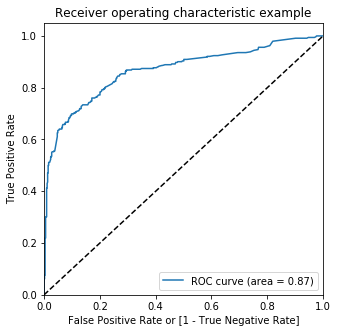

In [79]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PssngrID,predicted,Survive_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070095,1,0,0.070095,1,0,0,0,0,0,0,0,0,0
1,1,0.960090,2,1,0.960090,1,1,1,1,1,1,1,1,1,1
2,1,0.480266,3,0,0.480266,1,1,1,1,1,0,0,0,0,0
3,1,0.936990,4,1,0.936990,1,1,1,1,1,1,1,1,1,1
4,0,0.052793,5,0,0.052793,1,0,0,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.656566  0.909357  0.499089
0.2   0.2  0.731762  0.874269  0.642987
0.3   0.3  0.766554  0.862573  0.706740
0.4   0.4  0.787879  0.804094  0.777778
0.5   0.5  0.800224  0.742690  0.836066
0.6   0.6  0.826038  0.652047  0.934426
0.7   0.7  0.801347  0.511696  0.981785
0.8   0.8  0.758698  0.385965  0.990893
0.9   0.9  0.707071  0.245614  0.994536


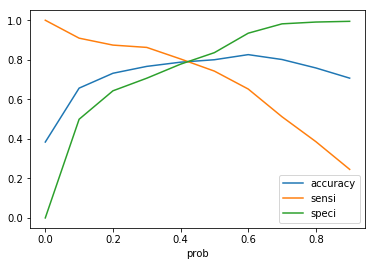

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Survived,Survived_Prob,PssngrID,predicted,Survive_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.070095,1,0,0.070095,1,0,0,0,0,0,0,0,0,0,0
1,1,0.960090,2,1,0.960090,1,1,1,1,1,1,1,1,1,1,1
2,1,0.480266,3,0,0.480266,1,1,1,1,1,0,0,0,0,0,1
3,1,0.936990,4,1,0.936990,1,1,1,1,1,1,1,1,1,1,1
4,0,0.052793,5,0,0.052793,1,0,0,0,0,0,0,0,0,0,0


# Making prediction on the Test Set

In [84]:
test[['Pclass','Age','Fare', 'CabLen', 'TickLen']] = scaler.transform(test[['Pclass','Age','Fare', 'CabLen', 'TickLen']])

In [85]:
test.head()

,PassengerId,Pclass,Age,Fare,SibPar,CabLen,TickLen,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_Q,Embarked_S,Sex_male
0,892.0,0.827377,0.357286,-0.490783,0.0,0.448375,-0.273633,0,1,0,0,0,0,1,1
1,893.0,0.827377,1.299031,-0.507479,1.0,0.448375,-0.273633,0,0,1,0,0,0,0,0
2,894.0,-0.369365,2.429125,-0.453367,0.0,0.448375,-0.273633,1,0,0,0,0,0,1,0
3,895.0,0.827377,-0.207761,-0.474005,0.0,0.448375,-0.273633,0,0,1,0,0,0,1,0
4,896.0,0.827377,-0.584459,-0.401017,2.0,0.448375,0.090802,0,1,0,0,0,0,1,1


In [86]:

y_test_df = pd.DataFrame(test['PassengerId'])

In [87]:
test = test[col]
test.head()

,Pclass,Age,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_S
0,0.827377,0.357286,1,0,0,0,1
1,0.827377,1.299031,0,1,0,0,0
2,-0.369365,2.429125,0,0,0,0,1
3,0.827377,-0.207761,0,1,0,0,1
4,0.827377,-0.584459,1,0,0,0,1


In [88]:
X_test_sm = sm.add_constant(test)

In [89]:
y_test_pred = res.predict(X_test_sm)

In [90]:
y_test_pred[100:150]

100    0.867091
101    0.176063
102    0.056319
103    0.062640
104    0.073910
105    0.060587
106    0.476452
107    0.056319
108    0.056319
109    0.845202
110    0.142850
111    0.612705
112    0.372181
113    0.487534
114    0.889686
115    0.071516
116    0.095211
117    0.094337
118    0.511070
119    0.719881
120    0.218073
121    0.056319
122    0.515505
123    0.445581
124    0.056319
125    0.632723
126    0.112297
127    0.067164
128    0.782487
129    0.064758
130    0.095779
131    0.304766
132    0.573128
133    0.587612
134    0.047088
135    0.108806
136    0.452169
137    0.178654
138    0.065841
139    0.084164
140    0.788921
141    0.886253
142    0.900798
143    0.270153
144    0.347646
145    0.057625
146    0.387360
147    0.472025
148    0.387360
149    0.172340
dtype: float64

In [91]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [92]:
y_pred_1.head()

,0
0,0.054342
1,0.659600
2,0.588548
3,0.610507
4,0.066942


In [94]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [95]:
y_pred_final.head()

,PassengerId,0
0,892.0,0.054342
1,893.0,0.659600
2,894.0,0.588548
3,895.0,0.610507
4,896.0,0.066942


In [96]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [97]:
# Let's see the head of y_pred_final
y_pred_final.head()

,PassengerId,Churn_Prob
0,892.0,0.054342
1,893.0,0.659600
2,894.0,0.588548
3,895.0,0.610507
4,896.0,0.066942


In [98]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [99]:
y_pred_final.head()

,PassengerId,Churn_Prob,final_predicted
0,892.0,0.054342,0
1,893.0,0.659600,1
2,894.0,0.588548,1
3,895.0,0.610507,1
4,896.0,0.066942,0
